# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드

In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = .3,
                                                 random_state = 111)

### 데이터 확인

In [3]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('학습 데이터: {}\t레이블: {}'.format(x_train.shape, y_train.shape))
print('검증 데이터: {}\t레이블: {}'.format(x_val.shape, y_val.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
검증 데이터: (18000, 28, 28)	레이블: (18000,)
테스트 데이터: (10000, 28, 28)	레이블: (10000,)


In [4]:
class_names = ['T-shirt\top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
              'Ankle boot']

In [5]:
y_train[0]

2

In [6]:
class_names[y_train[0]]

'Pullover'

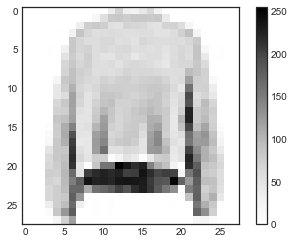

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

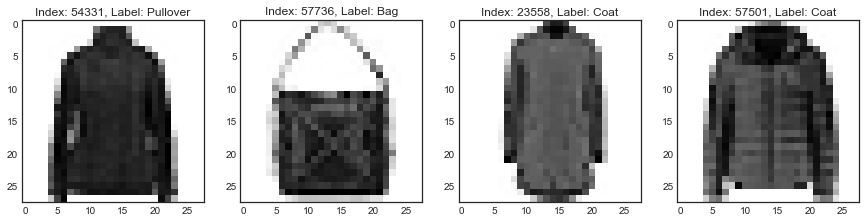

In [8]:
## 랜덤으로 샘플 4개 출력해보자

num_sample = 4

random_idxs = np.random.randint(60000, size = num_sample)

plt.figure(figsize = (15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title('Index: {}, Label: {}'.format(idx, class_names[label]))

### 데이터 전처리
- Normalization

- flatten

- loss='sparse_categorical_crossentropy'

In [9]:
# reshape으로 flatten하게 바꿔주자  >> Normalization
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

### 모델 구성 (함수형 API)

In [10]:
input = Input(shape = (784, ), name = 'input')
hidden1 = Dense(256, activation = 'relu', name = 'hidden1')(input)
hidden2 = Dense(128, activation = 'relu', name = 'hidden2')(hidden1)
hidden3 = Dense(64, activation = 'relu', name = 'hidden3')(hidden2)
hidden4 = Dense(32, activation = 'relu', name = 'hidden4')(hidden3)
output = Dense(10, activation = 'softmax', name = 'output')(hidden4)

model = Model(input, output)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_______________________________________________________

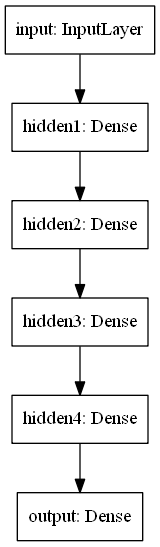

In [12]:
plot_model(model, to_file = 'fashion_mnist.png')

### 모델 컴파일

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = RMSprop(learning_rate = 0.01),
             metrics = ['acc'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [14]:
history = model.fit(x_train, y_train, epochs = 10,
                   batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
329/329 [==============================] - 4s 8ms/step - loss: 0.9772 - acc: 0.6980 - val_loss: 0.7284 - val_acc: 0.7688
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.5324 - acc: 0.8108 - val_loss: 0.8152 - val_acc: 0.7380
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4884 - acc: 0.8281 - val_loss: 0.5243 - val_acc: 0.8351
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4702 - acc: 0.8374 - val_loss: 0.5672 - val_acc: 0.7595
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4637 - acc: 0.8425 - val_loss: 0.5523 - val_acc: 0.8449
Epoch 6/10
329/329 [==============================] - 2s 8ms/step - loss: 0.4451 - acc: 0.8514 - val_loss: 0.9699 - val_acc: 0.7388
Epoch 7/10
329/329 [==============================] - 2s 8ms/step - loss: 0.4414 - acc: 0.8521 - val_loss: 0.6889 - val_acc: 0.7386
Epoch 8/10
329/329 [==============================] - 2s 7ms/step - loss: 0.

### 학습 결과 시각화

In [15]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

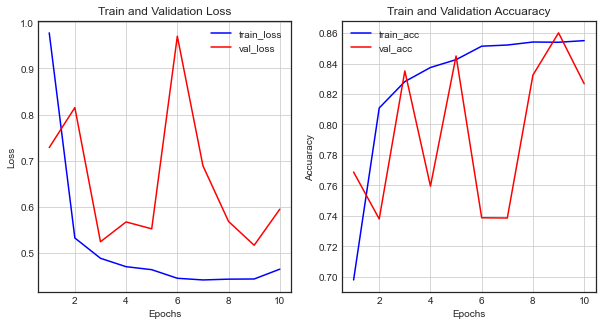

In [16]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title('Train and Validation Accuaracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuaracy')
ax2.grid()
ax2.legend()

plt.show()

## Train은 잘학습, Val 데이터가 불안정
### Validation Set이 불안정하니 다른 Optimizer를 사용해보자

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [17]:
from tensorflow.keras.optimizers import SGD

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = SGD(learning_rate = 0.01),
              metrics = ['acc'])

In [19]:
history2 = model.fit(x_train, y_train, epochs = 10, batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3411 - acc: 0.8797 - val_loss: 0.4120 - val_acc: 0.8666
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3227 - acc: 0.8820 - val_loss: 0.4094 - val_acc: 0.8677
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3192 - acc: 0.8825 - val_loss: 0.3990 - val_acc: 0.8702
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3150 - acc: 0.8838 - val_loss: 0.4076 - val_acc: 0.8679
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3134 - acc: 0.8834 - val_loss: 0.4062 - val_acc: 0.8663
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3123 - acc: 0.8842 - val_loss: 0.3991 - val_acc: 0.8684
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.3111 - acc: 0.8841 - val_loss: 0.4017 - val_acc: 0.8676
Epoch 8/10
329/329 [==============================] - 1s 5ms/step - loss: 0.

In [20]:
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

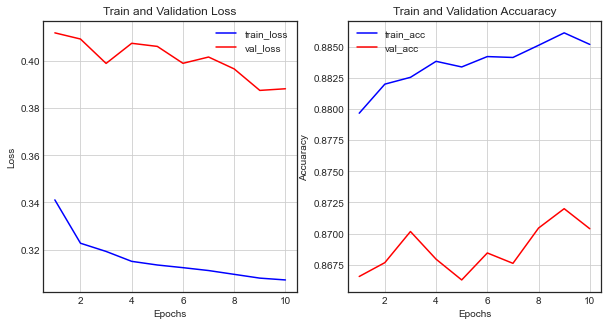

In [21]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


acc = history_dict['acc']
val_acc = history_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title('Train and Validation Accuaracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuaracy')
ax2.grid()
ax2.legend()

plt.show()


## 'RMSprop'보단 크게 벗어나는 수치는아님, 또한 train과 val간의 차이도 그렇게 큰편이 아님, 보다 안정된 성능 출력

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4395 - acc: 0.8613


[0.43953511118888855, 0.861299991607666]

### 학습된 모델을 통해 값 예측

In [23]:
print(x_test.shape)

(10000, 784)


In [24]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision = 7)
print(pred_ys[0])

(10000, 10)
[0.0000000e+00 0.0000000e+00 5.7980592e-26 0.0000000e+00 1.0069737e-29
 1.5201231e-02 9.5464807e-34 4.0583514e-02 7.3771539e-13 9.4421518e-01]


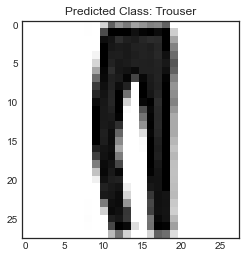

In [25]:
arg_pred_y = np.argmax(pred_ys, axis = 1)

plt.imshow(x_test[2].reshape(-1, 28))
plt.title('Predicted Class: {}'.format(class_names[arg_pred_y[2]]))
plt.show()

In [26]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(pred_ys)
    # 정답
    if predicted_label == y_test:
        color = 'blue'
    # 땡
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), 
               color = color)
    
def plot_value_array(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), pred_ys, color = '#777777')
    plt.ylim([0, 1])
    
    # 최종레이블 결과
    predicted_label = np.argmax(pred_ys)
    
    
    # 예측 레이블엔 빨강
    thisplot[predicted_label].set_color('red')
    # 실제 레이블엔 파랑
    thisplot[true_label].set_color('blue')

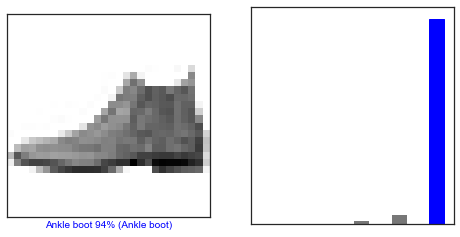

In [27]:
i = 0
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))      # x_test값은 이미 flatten되어있기에 다시 reshape
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

## 96%확률로 정답

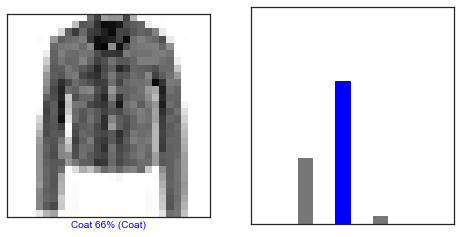

In [28]:
i = 10
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

## 65% 확률로 정답

C:\Users\LEE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


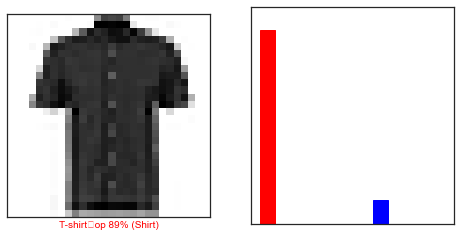

In [29]:
i = 40
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

## 땡

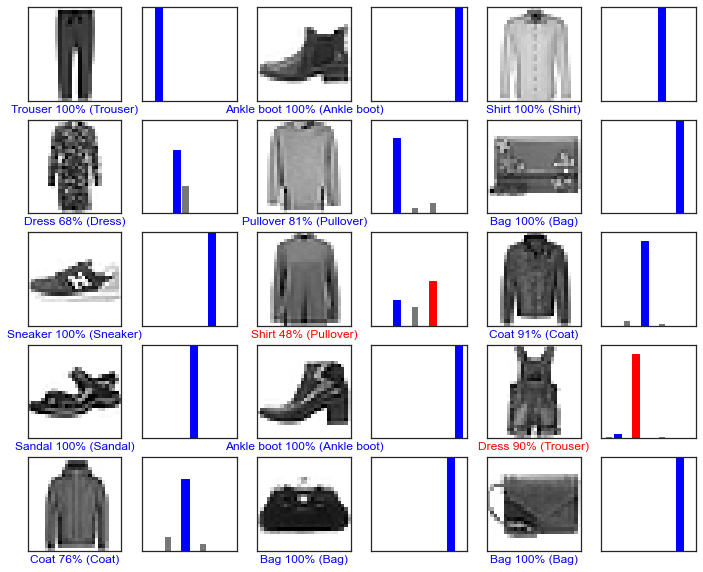

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size = num_images)
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2*num_cols, 2*idx+1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*idx+2)
    plot_value_array(num, pred_ys, y_test)
    
plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style = 'white')

from tensorflow.keras.utils import to_categorical

In [34]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

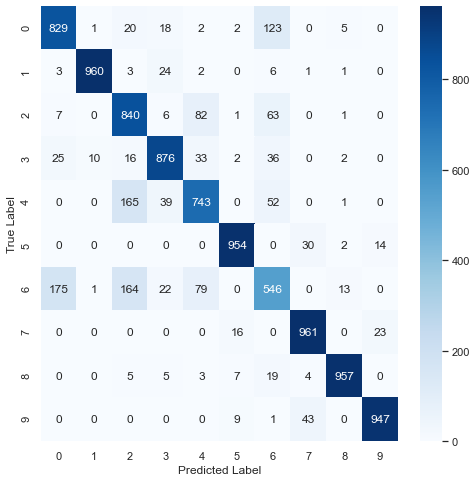

In [35]:
# confusion matrix
plt.figure(figsize = (8, 8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis = -1), np.argmax(pred_ys, axis = -1))
sns.heatmap(cm2, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [36]:
print(classification_report(np.argmax(y_test_che, axis = -1), np.argmax(pred_ys, axis = -1)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.69      0.84      0.76      1000
           3       0.88      0.88      0.88      1000
           4       0.79      0.74      0.76      1000
           5       0.96      0.95      0.96      1000
           6       0.65      0.55      0.59      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

